# Predicción de ataques cardíacos

Las **enfermedades cardiovasculares** son aquellas que afectan al corazón y a todas las arterias del organismo. Su principal causa es la *“aterosclerosis”*, que es el depósito de placas de colesterol en el interior de las paredes de las arterias, provocando su obstrucción y comprometiendo la llegada de la sangre a órganos vitales como el corazón, el cerebro y el riñón. Por esta razón, la enfermedad arterial aterosclerótica es la principal causa del infarto agudo de miocardio (IAM), del accidente cerebrovascular (ACV) y de los aneurisma.

Cuando se produce la obstrucción de una arteria y no hay flujo sanguíneo, se produce isquemia; si la arteria se rompe y hay pérdida de sangre, se produce hemorragia. La enfermedad coronaria es el compromiso aterosclerótico de las arterias que irrigan el corazón (las coronarias), pudiendo ocasionar un IAM.

A continuación detallamos los **principales factores de riesgo** cardiovascular:
* A mayor edad, mayor riesgo
* Antecedentes familiares de enfermedad cardiovascular prematura (padres/hermanos afectados antes de los 55 años en familiares hombres o antes de los 60 años en familiares mujeres)
* Tabaquismo
* Niveles elevados de colesterol en la sangre
* Presión arterial elevada (Hipertensión Arterial)
* Diabetes
* Sobrepeso y obesidad
* Inactividad física y estilo de vida sedentario
* Estrés crónico

*Fuente: https://www.argentina.gob.ar/salud/glosario/enfermedadcardiovascular*

**Integrantes:**
Carolina Abuelo - Carolina Orse



**Presentacion:**
En la actualidad, las enfermedades cardiovasculares (ECV) son las principales causas de muerte a nivel mundial. La Organización Mundial de la Salud (OMS) estimo en el 2015 que el 31% de todas las muertes mundiales fueron por ECV, siendo en total 17,7 millones de personas que murieron por ECV en los cuales el ataque cardiaco fue uno de los casos más comunes y potencialmente mortal (OMS, 2017).

La detección de ataques cardiacos es una tarea muy desafiante y más aún en países donde hay escases de expertos y equipos humanos (Javeed & Zhou, 2016), los estudios revelan que en países de ingresos bajos y medios más del 80% de las defunciones son por esta causa y afectan casi por igual a hombres y mujeres (Kim & Kang, 2017). En lo general los expertos médicos llegan a diagnósticos basados en electrocardiogramas, ecografías, resultados de análisis de sangre y su experiencia personal, lo que aumenta los riesgos de errores y retrasa el tratamiento apropiado (OMS, 2017). Por lo que, en solución a estos problemas, investigadores han desarrollado diferentes sistemas inteligentes empleando diversos modelos, algoritmos y han usado como entrada las variables de los diagnósticos permitiendo tener mayor precisión para la detección automática de ataques cardiacos.

El objetivo de nuestro trabajo es estudiar aquellas factores que comunmente afectan a los pacientes que sufren ataques cardiacos.

**Preguntas y Objetivos de la Investigacion:**

**Objetivo principal:** Identificar si existen patrones que puedan indicarnos que una persona esta por tener un ataque cardiaco

**Preguntas/Hipótesis:**
* Los parametros clínicos son predictores de mortalidad por ataque cardíaco
* Las patologías diabetes, anemia e hipertensión son factores predictores de mortalidad por ataque cardíaco
* El consumo de tabaco es un factor predictor de mortalidad por ataque cardíaco
* La edad y el sexo son un factor predictor de mortalidad por ataque cardíaco


**Fuente del Data Set:**

* **Origen:** Kaggle *(Link: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)*

**Criteros de Seleccion:**
* No hay datos nulos ni datos duplicados
* No hay variables categóricas
* Distrubución normal
* Dataset con menos de 300 datos, que permite una carga rápida de las query, como también rapidez en el entrenamiento y optimizaciones






# Análisis exploratorio de Datos

In [1]:
import pandas as pd
df_ha = pd.read_csv("heart attack.csv")
df_ha.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [2]:
#Variables: no hay variables categóricas, sólo numéricas
df_ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df= df_ha.rename({"age":"Edad", "anaemia":"Anemia", "creatinine_phosphokinase":"Creatina Cinasa",
                 "diabetes":"Diabetes", "ejection_fraction":"Fracción de eyección", "high_blood_pressure":"Hipertensión",
                 "platelets": "Plaquetas", "serum_creatinine":"Creatina en sangre", "serum_sodium":"Sodio en sangre",
                 "sex":"Sexo", "smoking":"Fumador", "time":"Tiempo", "DEATH_EVENT":"Muerte"}, axis=1)
df.columns

Index(['Edad', 'Anemia', 'Creatina Cinasa', 'Diabetes', 'Fracción de eyección',
       'Hipertensión', 'Plaquetas', 'Creatina en sangre', 'Sodio en sangre',
       'Sexo', 'Fumador', 'Tiempo', 'Muerte'],
      dtype='object')

**Descripción de las variables**

* Edad - Edad del paciente
* Sexo - Genero del paciente (Mujer=0, Hombre=1)
* Creatina Cinasa - Nivel de la encima CPK en sangre
* Fracción de eyección - Medida del porcentaje de sangre que sale del corazón cada vez que este se contrae
* Plaquetas - Cantidad de plaquetas en sangre
* Diabetes - Pacientes con la patología (No=0, Si=1)
* Anemia - Pacientes con la patología (No=0, Si=1)
* Hipertensión - Pacientes con la patología (No=0, Si=1)
* Fumador - Consumo de tabaco del paciente (NO fumador=0, Fumador=1)
* Muerte - (No falleció=0, Falleció=1) - **Variable Target** 


In [4]:
#Datos Nulos: el dataset no posee datos nulos
a = df.isnull().sum()
print(a)

Edad                    0
Anemia                  0
Creatina Cinasa         0
Diabetes                0
Fracción de eyección    0
Hipertensión            0
Plaquetas               0
Creatina en sangre      0
Sodio en sangre         0
Sexo                    0
Fumador                 0
Tiempo                  0
Muerte                  0
dtype: int64


In [5]:
#Datos duplicados: no hay datos duplicados
b = df.duplicated()
print(b)

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool


In [6]:
df["Muerte"] = df["Muerte"].replace([0,1],["Sobrevive","Muere"])

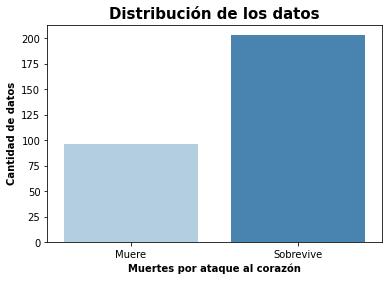

In [7]:
#Distribución de los datos
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df.Muerte, palette='Blues')
sns.set_theme(style="dark")
plt.xlabel('Muertes por ataque al corazón', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de datos', fontsize=10, fontweight='bold')
plt.title('Distribución de los datos', fontweight = 'bold', fontsize='15')
plt.show()

La información esta **balanceada** respecto a la variable target, al contar con un 33,11% (99 de los 299 casos observados) que mueren por ataques al corazón.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


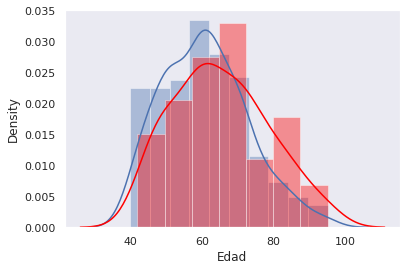

In [8]:
#Distribución Población vs. Variable Target por Edad

#Nuevo dataset c/filtro
death = df[df["Muerte"] == "Muere"]
sns.set_theme(style="dark")
sns.distplot(df.Edad, hist=True)
sns.distplot(death.Edad, hist=True, color= "Red", label="Ataque")
plt.show()

En el gráfico visualizamos la distribución entre los casos que sufren un infarto y la población en general respecto la edad, las cuales son en gran parte similares, determinando así que la **distribución de la variable target** según la edad de los participantes de la observación es **normal**.

# Análisis por Gráficos

**Parámetros clínicos**

[Text(0.5, 1.0, 'Plaquetas')]

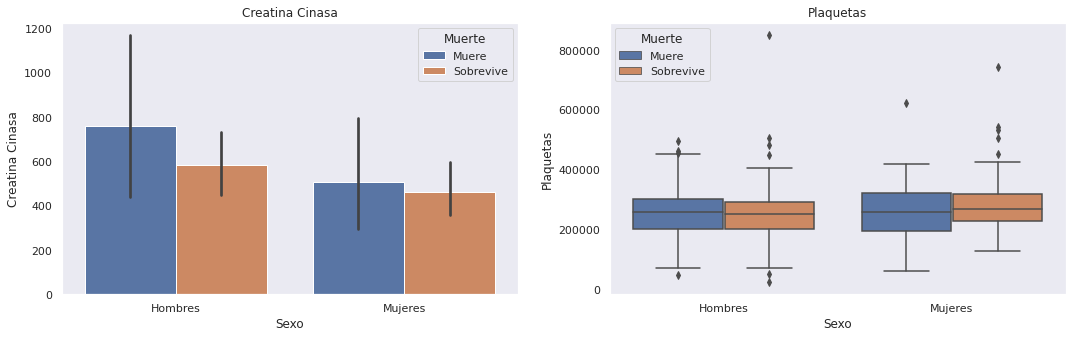

In [9]:
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(18,5))
df["Sexo"] = df["Sexo"].replace([0,1],["Mujeres","Hombres"])
sns.set_theme(style="darkgrid")
sns.barplot(x="Sexo", y="Creatina Cinasa", hue="Muerte", data=df, ax=axes[0]).set(title='Creatina Cinasa')
sns.boxplot(x="Sexo", y="Plaquetas", hue="Muerte", data=df, ax=axes[1]).set(title='Plaquetas')

[Text(0.5, 1.0, 'Sodio en sangre')]

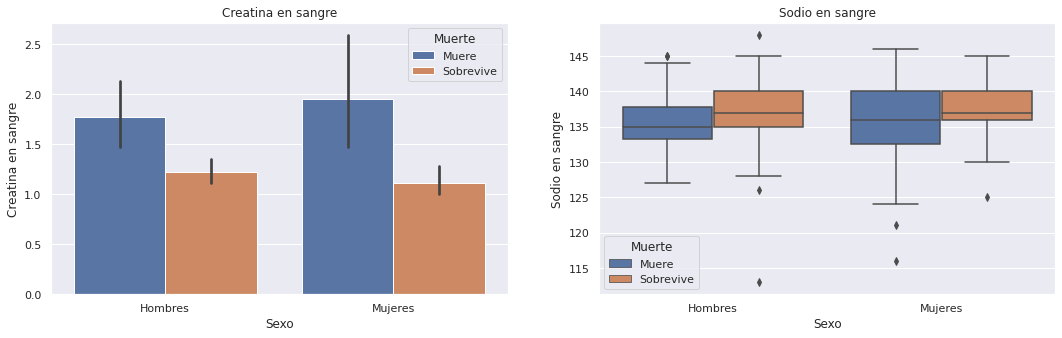

In [10]:
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(18,5))
sns.barplot(x="Sexo", y="Creatina en sangre", hue="Muerte", data=df, ax=axes[0]).set(title='Creatina en sangre')
sns.boxplot(x="Sexo", y="Sodio en sangre", hue="Muerte", data=df, ax=axes[1]).set(title='Sodio en sangre')

Conclusión parámetros clínicos


**Patologías - Hábitos de consumo observados**

[Text(0.5, 1.0, 'Anémicos')]

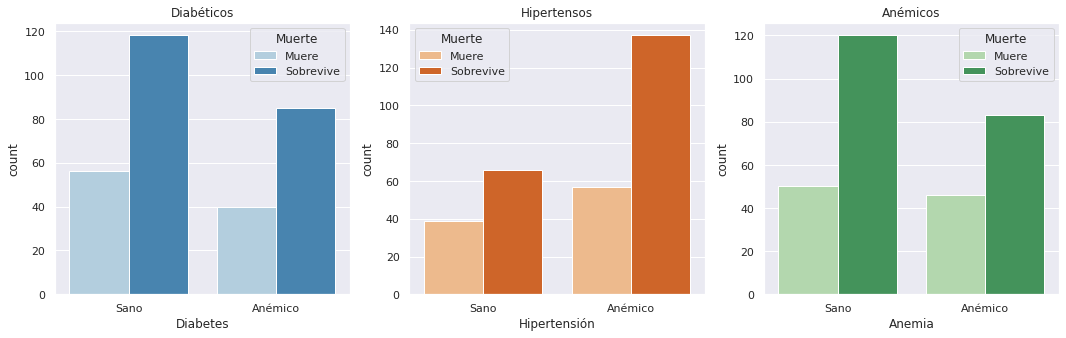

In [11]:
#Análisis de las patologías observadas
#Nuevos tag
df["Diabetes"] = df["Diabetes"].replace([0,1],["Sano","Diabético"])
df["Hipertensión"] = df["Hipertensión"].replace([0,1],["Sano","Hipertenso"])
df["Anemia"] = df["Anemia"].replace([0,1],["Sano","Anémico"])

fig , axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,5))
sns.countplot(x=df.Diabetes, hue=df.Muerte, ax=axes[0], palette='Blues').set(title='Diabéticos')
sns.countplot(x=df.Hipertensión, ax=axes[1], hue=df.Muerte, palette='Oranges').set(title='Hipertensos')
sns.countplot(x=df.Anemia, ax=axes[2], hue=df.Muerte, palette='Greens').set(title='Anémicos')

En los gráficos visualizamos que una comorbilidad tanto en caso de diabetes, anémia como hipertensión no son determinantes para sufrir un ataque cardíaco, ya que en todos los casos que los pacientes padecen la patología no tienen un porcentaje mayor de muertes que aquellos que estan sanos/no la padecen.

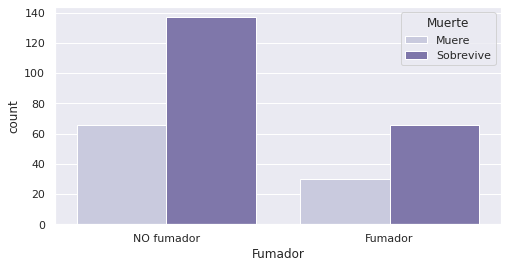

In [12]:
#Análisis de los hábitos de consumo: fumadores
#Nuevo tag
df["Fumador"] = df["Fumador"].replace([0,1],["NO fumador","Fumador"])

plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(8,4))
sns.countplot(x=df.Fumador, hue=df.Muerte, palette='Purples')

En el caso de los fumadores, podemos determinar que tampoco el consumo de tabaco es un factor determinante a la hora de predecir pacientes con posibles ataques cardíacos.

In [13]:
#Taggeo Hombre - Mujer
df["Sexo"] = df["Sexo"].replace([0,1],["Mujeres","Hombres"])

**Relación de la Variable Target c/el Sexo**

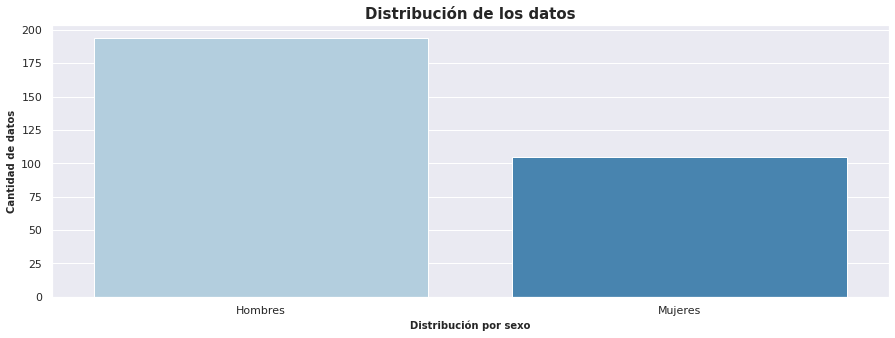

In [14]:
#Valores Nominales por Sexo
plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(15,5))
sns.countplot(x=df.Sexo, palette='Blues')
plt.xlabel('Distribución por sexo', fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de datos', fontsize=10, fontweight='bold')
plt.title('Distribución de los datos', fontweight = 'bold', fontsize='15')
plt.show()

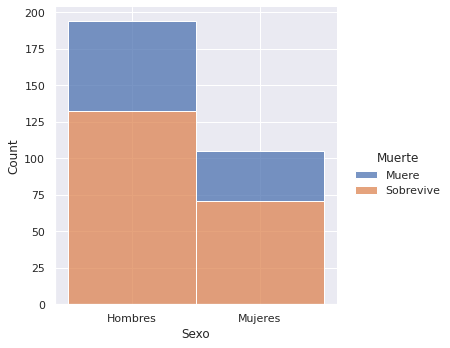

In [15]:
df["Sexo"] = df["Sexo"].replace([0,1],["Mujeres","Hombres"])
sns.displot(data=df, x="Sexo", hue="Muerte", multiple="stack")

En el gráfico visualizamos que de la muestra observada, en términos nominales podemos decir que los hombres son los más propensos a sufrir un infarto, pero haciendo un análisis a mayor detalle, la muestra está nominalmente en mayor parte conformada por hombres siendo esto un sesgo en la muestra. Tras dicha observación, analizaremos la muestra según género en porcentajes.

In [26]:
#Análisis según género
df["Sexo"] = df["Sexo"].replace(["Mujeres","Hombres"],[0,1])

Hombres = df[df["Sexo"]==1]
Mujeres = df[df["Sexo"]==0]

Hombres_surv = Hombres[Hombres["Muerte"]=="Sobrevive"]
Hombres_stroke = Hombres[Hombres["Muerte"]=="Muere"]
Mujeres_surv = Mujeres[Mujeres["Muerte"]=="Sobrevive"]
Mujeres_stroke = Mujeres[Mujeres["Muerte"]=="Muere"]

import plotly.graph_objs as go
fig = go.Figure(data=[go.Pie(labels=['Hombres sobreviven','Hombres mueren'], values=[len(Hombres_surv),len(Hombres_stroke)], hole=.4, title= 'Hombres')])
fig2 = go.Figure(data=[go.Pie(labels=['Mujeres sobreviven','Mujeres mueren'], values=[len(Mujeres_surv),len(Mujeres_stroke)], hole=.4, title ='Mujeres')])
print(fig.show())
print(fig2.show())

None


None


A diferencia de los resultados nominales, mirando .........

In [27]:
death["Sexo"] = death["Sexo"].replace([0,1],["Mujeres","Hombres"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



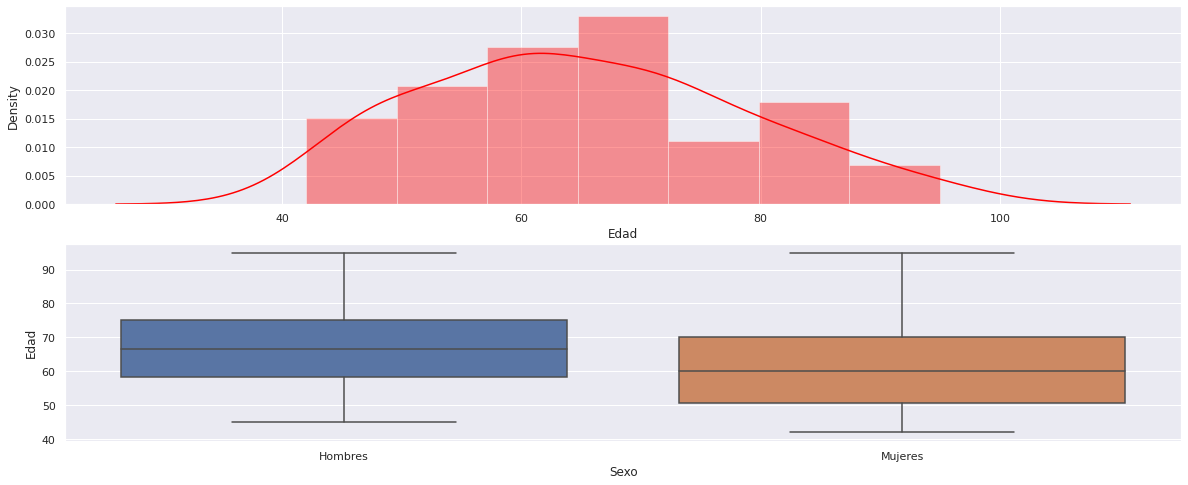

In [28]:
#Análisis según Edad y Sexo
fig , axes = plt.subplots(nrows=2, ncols=1, figsize=(20,8))
sns.distplot(death.Edad, hist=True, color= "Red", ax=axes[0], label="Ataque")
sns.boxplot(x="Sexo", y="Edad", ax=axes[1], data=death)

In [29]:
sexo_edad = death.groupby("Sexo").mean()["Edad"]
sexo_edad

Sexo
Hombres    66.881726
Mujeres    62.176471
Name: Edad, dtype: float64

Observamos que la población de riesgo de sufrir un ataque en la muestra observada, es entre los 50 y los 70, siendo en los hombres un promedio de edad de 62 y en mujeres de 66.

# Análisis de la correlación entre las variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



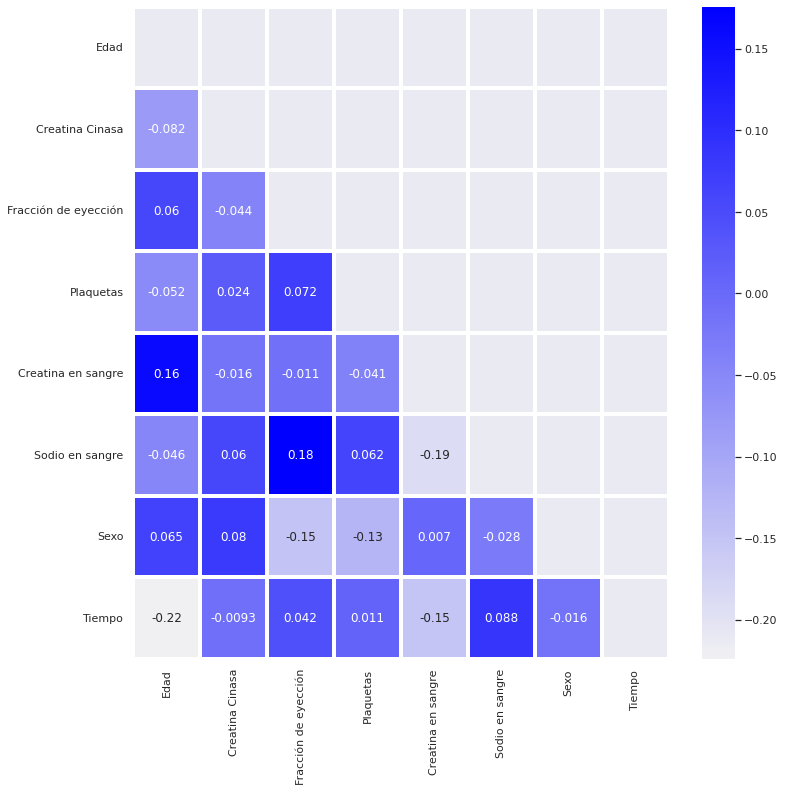

In [30]:
#Indago sobre la correlación entre las variables
corr = df.corr()

import numpy as np
mask = np.triu(np.ones_like(corr, dtype = np.bool)) #seleccionar triángulo superior de la matriz para omitirla

#mapa de calor sobre valores de heatmap
plt.rcParams['figure.figsize'] = 12, 12
cmap = sns.light_palette('blue', as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, linewidth = 3)

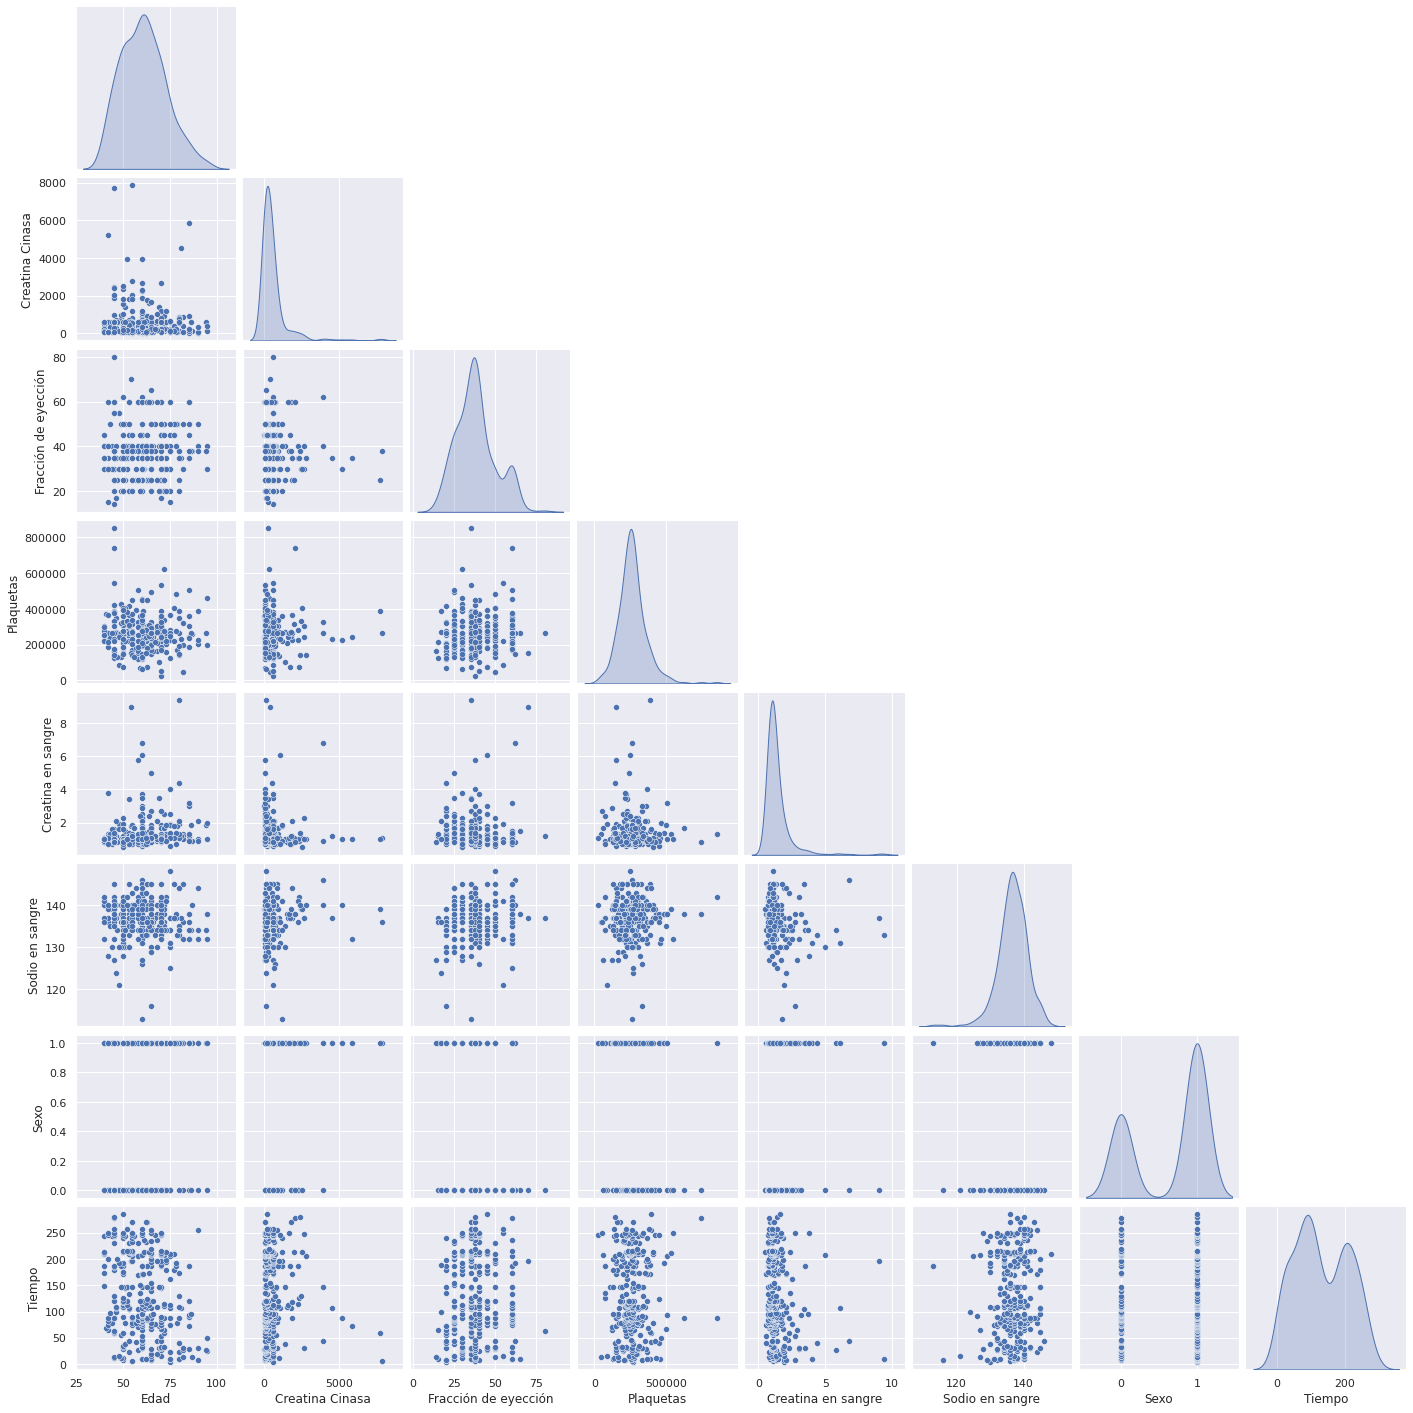

In [21]:
#Análisis de las distrubuciones de cada variable
sns.pairplot(df, diag_kind = 'kde', corner = True)

In [22]:
df["Sexo"] = df["Sexo"].replace(["Mujeres","Hombres"],[0,1])

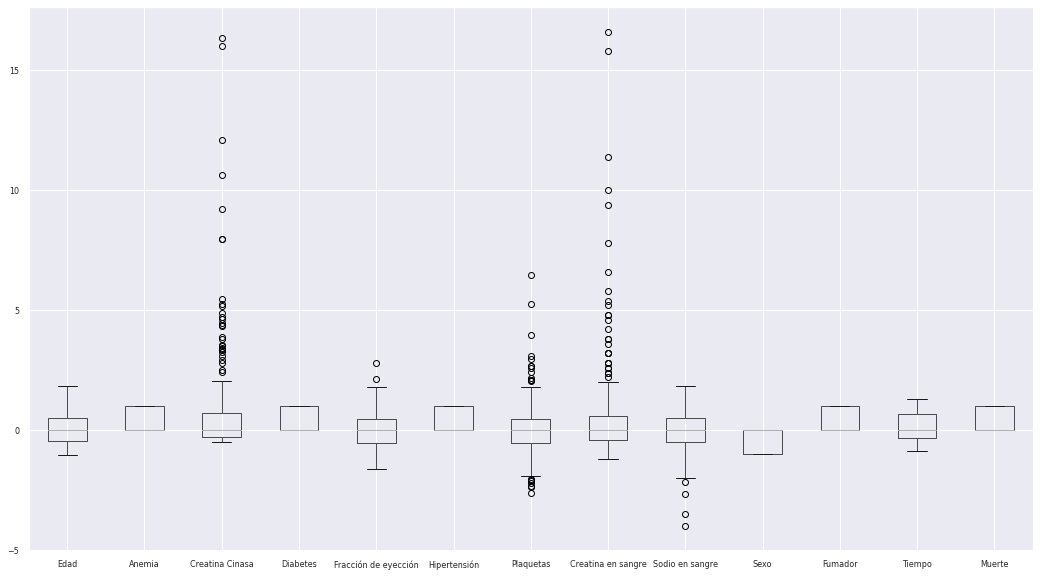

In [37]:
from sklearn.preprocessing import RobustScaler

df_copy = df.copy() #copio df
scale = RobustScaler() #define scaler

#Nuevos tag
df_copy["Diabetes"] = df_copy["Diabetes"].replace(["Sano","Diabético"],[0,1])
df_copy["Hipertensión"] = df_copy["Hipertensión"].replace(["Sano","Hipertenso"],[0,1])
df_copy["Anemia"] = df_copy["Anemia"].replace(["Sano","Anémico"],[0,1])
df_copy["Fumador"] = df_copy["Fumador"].replace(["NO fumador","Fumador"],[0,1])
df_copy["Muerte"] = df_copy["Muerte"].replace(["Sobrevive","Muere"],[0,1])

#trasform data
sData = pd.DataFrame(scale.fit_transform(df_copy), columns = df_copy.columns)
#visual all data sclaled , find outliers
sData.boxplot(figsize = (18, 10), fontsize=8)

# Transformaciones sobre el Dataset Original

Seleccionamos algunas de las variables en base a su importancia previo a correr los modelos.

In [38]:
#Copio DF original
df2 = df.copy() 

#Delete variables no significativas para nuestro objetivo
df2.drop('Tiempo', axis=1, inplace=True)
df2.drop('Fracción de eyección', axis=1, inplace=True)

In [47]:
#Nuevos tags
df2["Diabetes"] = df2["Diabetes"].replace(["Sano","Diabético"],[0,1])
df2["Hipertensión"] = df2["Hipertensión"].replace(["Sano","Hipertenso"],[0,1])
df2["Anemia"] = df2["Anemia"].replace(["Sano","Anémico"],[0,1])
df2["Fumador"] = df2["Fumador"].replace(["NO fumador","Fumador"],[0,1])
df2["Muerte"] = df2["Muerte"].replace(["Sobrevive","Muere"],[0,1])

df2.head() #Nuevo Dataset

,Edad,Anemia,Creatina Cinasa,Diabetes,Hipertensión,Plaquetas,Creatina en sangre,Sodio en sangre,Sexo,Fumador,Muerte
0,75.0,0,582,0,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,0,327000.00,2.7,116,0,0,1


In [48]:
#Estadística descriptiva
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatina Cinasa,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Hipertensión,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Plaquetas,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Creatina en sangre,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Sodio en sangre,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sexo,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0
Fumador,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0


Tanto la media como el promedio de edad es de 60 años, siendo el mínimo de 40 y el máximo de 95 (min-max outliers). 

In [49]:
#Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Modelos Algorítmicos

In [50]:
#Spliteamos los datos para entrenar y el target
X = df2.drop("Muerte", axis=1)
y = df2["Muerte"]

In [51]:
#Spliteo Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

1. **Regresión Logística**

Utilizamos dicho modelo dado que el mismo se recomienda en casos que el dataset cuente con varias variables booleanas/dicotómicas, entre ellas: diabetes, hipertensión, fumador, sexo, anemia y muerte.

In [52]:
#Transformación numérica
scaler = MinMaxScaler()
X_train_enc = scaler.fit_transform(X_train)
X_test_enc = scaler.transform(X_test)

In [53]:
#Entrenamiento
clf = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf.fit(X_train_enc, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=34)

In [98]:
#Predición: transformo el dataset TEST 
my_predictions = []
X_test_enc = scaler.transform(X_test)
predictions = clf.predict(X_test_enc)

In [99]:
#Métrica: Accuracy
A = accuracy_score(y_test, predictions)
my_predictions.append(A)
print('El porcentaje de acierto de RL es de:', '{:.2f}%'.format(100*A))

El porcentaje de acierto de RL es de: 63.33%


In [56]:
RL = classification_report(y_test, predictions)
print(RL)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        35
           1       1.00      0.12      0.21        25

    accuracy                           0.63        60
   macro avg       0.81      0.56      0.49        60
weighted avg       0.77      0.63      0.53        60



2. **Random Forest Classifier**

In [57]:
#Crear el clasificador
classifier = RandomForestClassifier(n_estimators=11, random_state=0, criterion='entropy')

#Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [58]:
#Predicción
y_pred = classifier.predict(X_test)

In [100]:
#Métrica Accuracy
D = accuracy_score(y_test,y_pred)
my_predictions.append(D)
print('El porcentaje de acierto es de:', '{:.2f}%'.format(100*D))

El porcentaje de acierto es de: 66.67%


In [60]:
RFC = classification_report(y_test, y_pred)
print(RFC)

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        35
           1       0.73      0.32      0.44        25

    accuracy                           0.67        60
   macro avg       0.69      0.62      0.60        60
weighted avg       0.68      0.67      0.63        60



3. **Decision Tree**

Los datos proporcionados en el dataset son numéricos y, la variable target, es una variable booleana.

In [61]:
#Entrenamiento
model = tree.DecisionTreeClassifier(random_state = 30) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [62]:
#Predicción
y_predicción_test = model.predict(X_test)

In [101]:
#Métrica: Accuracy
B = accuracy_score(y_test,y_predicción_test)
my_predictions.append(B)
print('El porcentaje de acierto es de:', '{:.2f}%'.format(100*B))

El porcentaje de acierto es de: 61.67%


In [64]:
DT = classification_report(y_test, y_predicción_test)
print(DT)

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        35
           1       0.56      0.40      0.47        25

    accuracy                           0.62        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.61      0.62      0.60        60



Primera conclusión
1° RFC
2° Decision Tree
3° Regresión Logística

# Optimizaciones

1.1. **Logistic Optimizado con RandomizedSearchCV**

In [65]:
#Logistic - importo librerias
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import warnings
warnings.filterwarnings('ignore') 

# Grilla de parámetros
parameters = {'penalty': ['l1', 'l2'],
'C': [1 , 0.5, 0.1, 0.05, 0.01],
'class_weight': ['balanced', None],
'solver': ['liblinear', 'lbfgs'],
'max_iter': [100,200,300]}


lr = LogisticRegression()
randm_src_lr = RandomizedSearchCV(estimator=lr, param_distributions = parameters,
                               cv = 3, n_iter = 30,scoring='accuracy', random_state=30)

In [66]:
randm_src_lr.fit(X_train_enc, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': [1, 0.5, 0.1, 0.05, 0.01],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=30, scoring='accuracy')

In [114]:
mp2 = []
LR1 = randm_src_lr.best_score_
print("Mejor Score: "+str(LR1)+'\n')
mp2.append(LR1)

Mejor Score: 0.72373417721519



1.2. **Cross Validation para Logistic Optimizado**

In [68]:
#Importo librerias Cross Validation
from sklearn.model_selection import cross_val_score
CV_scores = cross_val_score(randm_src_lr, X_train_enc, y_train, cv=3)

In [69]:
print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

Cross validation score es  0.72373 ± 0.02


El modelo de regresión logística tras su optimización, tanto mediante Cross Validation y RandomizedSearchCV, arroja un score en ambos casos de 72%.

2.1. **RandomForestClassifier Optimizado con RandomizedSearchCV**

In [70]:
#Forest - importo librerias
from scipy.stats import randint
parameters = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": randint(100,1000),
    "max_depth": randint(4, 100) 
}

rf = RandomForestClassifier()

randm_src_rf = RandomizedSearchCV(estimator=rf, param_distributions = parameters,
                               cv = 5, verbose = 2,random_state=30, scoring="accuracy")

In [71]:
randm_src_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.1s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.1s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.1s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.1s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.1s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.1s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=57, max_features=1, n_estimators=245; total time=   0.3s
[CV] END .....max_depth=57, max_features=1, n_es

In [115]:
RF2 = randm_src_rf.best_score_
print("Mejor Score: "+str(RF2)+'\n')
mp2.append(RF2)

Mejor Score: 0.7613475177304965



2.2. **Cross Validation para RandomForestClassifier Optimizado**

In [72]:
from sklearn.model_selection import cross_val_score
CV_scores = cross_val_score(randm_src_rf, X_train_enc, y_train, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END ...max_depth=41, max_features=0.5, n_estimators=913; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.1s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.0s
[CV] END .....max_depth=16, max_features=1, n_estimators=998; total time=   1.1s
[CV] END .....max_depth=57, max_features=1, n_estimators=245; total time=   0.3s
[CV] END .....max_depth=57, max_features=1, n_es

In [73]:
print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

Cross validation score es  0.75319 ± 0.04


Al optimizar Random Forest Classifier, visualizamos que para ambos casos el nuevo score es de 75/76%.

3.1. **DecisionTreeClassifier Optimizado con RandomizedSearchCV**

In [75]:
#Tree - Importo librerias
from scipy.stats import randint
parameters2 = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": randint(100,1000),
    "max_depth": randint(4, 100) 
}
parameters = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

dt = tree.DecisionTreeClassifier()

randm_src_dt = RandomizedSearchCV(estimator=dt, param_distributions = parameters,
                               cv = 5, verbose = 2,scoring="accuracy",random_state=30)

In [76]:
randm_src_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f58e3ab1c10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f58e2492710>},
                   random_state=30, scoring='accuracy', verbose=2)

In [116]:
DT2=randm_src_dt.best_score_
print("Mejor Score: "+str(DT2)+'\n')
mp2.append(DT2)

Mejor Score: 0.7531028368794327



3.2. **Cross Validation para DecisionTreeClassifier Optimizado**

In [78]:
from sklearn.model_selection import cross_val_score
CV_scores = cross_val_score(randm_src_dt, X_train_enc, y_train, cv=5);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=8, min_samples_leaf=3

In [79]:
print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

Cross validation score es  0.72367 ± 0.03


Optimizamos el modelo decision tree y arrojó un score 72/75%.

# Indicadores de desempeño de los Modelos

In [102]:
my_predictions

[0.6333333333333333, 0.6666666666666666, 0.6166666666666667]

In [117]:
mp2

[0.72373417721519, 0.7613475177304965, 0.7531028368794327]

In [137]:
import pandas as pd
#Accuracy por Modelo SIN optimizaciones
datos= my_predictions
Modelos = ['Logistic Regression', 'Random Forest Classifier','Decision Tree']
AC = ['Accuracy']

df_ac = pd.DataFrame(datos, columns=AC, index=Modelos)
C = df_ac.index
print(df_ac)

                          Accuracy
Logistic Regression       0.633333
Random Forest Classifier  0.666667
Decision Tree             0.616667


In [138]:
#Accuracy por Modelo CON optimizaciones
datos= mp2
Modelos = ['Logistic Regression', 'Random Forest Classifier','Decision Tree']
AC = ['Accuracy']

df2_ac = pd.DataFrame(datos, columns=AC, index=Modelos)
W = df2_ac.index
print(df2_ac)

                          Accuracy
Logistic Regression       0.723734
Random Forest Classifier  0.761348
Decision Tree             0.753103


[Text(0.5, 1.0, 'Accuracy de los Modelos Optimizados')]

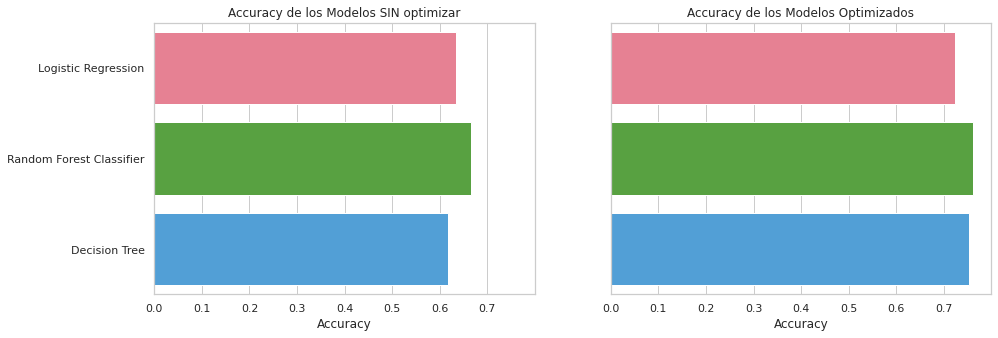

In [141]:
fig , axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5), sharey=True)
sns.set_style('whitegrid')
#Gráfico SIN optimizaciones
sns.barplot(data=df_ac, x="Accuracy", y=C, palette = "husl", ax=axes[0]).set(title='Accuracy de los Modelos SIN optimizar')
#Gráfico CON optimizaciones
sns.barplot(data=df2_ac, x="Accuracy", y=W, palette = "husl", ax=axes[1]).set(title='Accuracy de los Modelos Optimizados')

#sns.barplot(x="Sexo", y="Creatina Cinasa", hue="Muerte", data=df, ax=axes[0]).set(title='Creatina Cinasa')

# Conclusión
Modelo elegido:

Motivos: